In [ ]:
#Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
'''✅ Fundamental Idea:
Ensemble techniques combine predictions from multiple models (weak learners) to create a stronger, more accurate overall model. The key idea is that
a group of weak models can work together to reduce errors, variance, or bias better than any single model alone.

Bagging (Bootstrap Aggregating):
Approach:
Trains multiple independent models on different random subsets of the training data (with replacement).

Objective:
To reduce variance and prevent overfitting.

Example: Random Forest (ensemble of Decision Trees).

Key Point:
Models are trained in parallel, and their results are averaged or voted to get the final output.

Boosting:
Approach:
Trains models sequentially, where each new model focuses on correcting the errors made by previous models.

Objective:
To reduce bias and improve prediction accuracy.

Example: AdaBoost, Gradient Boosting, XGBoost.

Key Point:
Models are trained one after another, giving more weight to misclassified samples.

| Aspect        | Bagging                           | Boosting                             |
| ------------- | --------------------------------- | ------------------------------------ |
| Training      | Parallel                          | Sequential                           |
| Focus         | Reduce variance                   | Reduce bias                          |
| Data Sampling | Random subsets (with replacement) | Weighted re-sampling based on errors |
| Example       | Random Forest                     | AdaBoost, XGBoost                    |'''


In [ ]:
#Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
'''✅ Explanation:
A single decision tree tends to overfit because it tries to perfectly classify all training samples, capturing noise and small fluctuations in data.
A Random Forest Classifier, on the other hand, reduces overfitting by combining predictions from many decision trees built on different subsets of data
and features. This ensemble averaging smooths out individual tree errors, leading to better generalization on unseen data.

How Random Forest reduces overfitting:

Bootstrap Sampling (Bagging):
Each tree is trained on a random subset of the training data (with replacement).
→ This introduces diversity among trees and reduces correlation between them.

Random Feature Selection:
At each split, the algorithm considers only a random subset of features, not all features.
→ Prevents dominant features from driving all trees to make similar splits.

These two mechanisms ensure that the forest’s trees are less correlated, and their averaged output reduces variance — the main cause of overfitting.

Two Key Hyperparameters and Their Roles:
Hyperparameter	Role in Reducing Overfitting
n_estimators	Number of trees in the forest. More trees → better averaging → lower variance (up to a point).
max_features	Number of features considered at each split. Lower values → more randomness → trees become less correlated → reduces overfitting.

In summary:
Random Forest combats overfitting by using multiple de-correlated trees through bagging and feature randomness, and by tuning parameters 
like n_estimators and max_features to balance bias and variance effectively.'''

In [ ]:
#Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
'''Stacking (Stacked Generalization) is an ensemble learning technique where multiple different models (level-1 learners) are trained on the same 
dataset, and their predictions are then combined by a meta-model (level-2 model) that learns the best way to blend these outputs for final prediction.

How Stacking Works:

Base models (level-1 learners) — e.g., Decision Tree, Logistic Regression, SVM — each learn patterns from the training data.

Their predictions (on validation data) become inputs to a meta-model (level-2 learner) — e.g., Linear Regression, Random Forest.

The meta-model learns how to best combine the outputs of base models to make the final prediction.

How Stacking Differs from Bagging and Boosting:
Aspect	Bagging	Boosting	Stacking
Model Diversity	Same model type (e.g., many Decision Trees)	Same model type, sequentially improved	Different model types (e.g., Tree, SVM, Logistic)
Training Method	Parallel (independent models)	Sequential (each corrects previous errors)	Two-stage (base + meta model)
Goal	Reduce variance	Reduce bias	Combine strengths of different algorithms
Final Prediction	Averaging or voting	Weighted combination (based on performance)	Learned combination via meta-model

Simple Example Use Case:
Suppose you are predicting loan approval based on applicant data.
You can use:

Base models: Decision Tree, Logistic Regression, and KNN.

Meta-model: Random Forest.

Each base model captures different patterns in the data, and the Random Forest meta-model learns how to optimally weight their predictions — improving
overall accuracy and robustness.'''

In [1]:
#Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
'''Definition (OOB Score):
OOB (Out-of-Bag) Score is an internal validation score used in Random Forests to estimate the model’s performance without needing a separate validation
or test set.
It is based on the data samples not used (left out) when building each decision tree.

How It Works:

In Random Forest, each tree is trained on a bootstrap sample (random sample with replacement) of the training data.

On average, about 63% of the training samples are used to train a tree, leaving around 37% of the samples unused (out-of-bag) for that tree.

These unused samples act as a validation set for that particular tree.

After all trees are trained, each sample’s prediction is computed only from the trees where it was OOB, and the overall accuracy (or error) from 
these predictions is the OOB Score.

Why It’s Useful:

Provides an unbiased performance estimate during training.

Eliminates the need for a separate validation set, saving data for actual testing.

Acts as a built-in cross-validation mechanism.

In summary:
Aspect	Description
Meaning	Accuracy estimated using samples not seen by trees during training.
Purpose	Evaluate model performance without a separate validation set.
Advantage	Saves data, gives unbiased accuracy estimate, and helps detect overfitting early.
Parameter in sklearn	oob_score=True when creating RandomForestClassifier.'''

# example
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X, y)
print("OOB Score:", model.oob_score_)

'''The printed OOB score gives an approximation of test accuracy — no separate validation data needed.'''

OOB Score: 0.9533333333333334


In [ ]:
#Question 5: Compare AdaBoost and Gradient Boosting in terms of:
#● How they handle errors from weak learners
#● Weight adjustment mechanism
#● Typical use cases
'''Here’s a clear and concise comparison between AdaBoost and Gradient Boosting 

|   Aspect                                      |   AdaBoost                                                                                                                       |   Gradient Boosting                                                                                                                            |
| --------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
|   How they handle errors from weak learners   | Focuses more on **misclassified samples** by increasing their weights so that the next weak learner pays more attention to them. | Trains each new learner to **minimize the residual errors** (the difference between actual and predicted values) of the previous learners.     |
|   Weight adjustment mechanism                 | Adjusts **sample weights** — increases weights of misclassified points and decreases weights of correctly classified ones.       | Adjusts **model weights (residuals)** by fitting each new learner to the **gradient of the loss function** (error minimization approach).      |
|   Typical use cases                           | Classification problems (e.g., spam detection, face recognition). Works best with weak learners like decision stumps.            | Both regression and classification (e.g., house price prediction, credit scoring). Commonly used in advanced models like XGBoost and LightGBM. |

Summary:

* AdaBoost → focuses on reweighting data points based on misclassification.
* Gradient Boosting → focuses on correcting errors by optimizing residuals using gradients.'''


In [ ]:
#Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
'''CatBoost performs well on categorical features because it has a built-in mechanism to handle them directly — no need for one-hot or label encoding.

Here’s how it works 

Efficient Encoding (Target Statistics Encoding):

Instead of converting categories into dummy variables, CatBoost replaces each categorical value with a numerical statistic — typically the mean target
value for that category.

For example, if the category is “City,” CatBoost replaces each city with the average label value (like average purchase rate) computed from the 
training data.

Permutation-Based Encoding (to avoid target leakage):

CatBoost computes these statistics sequentially using random permutations of the dataset.

This ensures that when encoding a sample, only the data before it in the permutation is used — preventing the model from “seeing” future (target)
information.

Advantages:

Handles categorical data natively and efficiently.

Prevents overfitting caused by direct target encoding.

Reduces the need for manual preprocessing (like one-hot encoding).

In short:
CatBoost uses target-based encoding with random permutations, allowing it to naturally and safely handle categorical features — which is why it 
performs exceptionally well even without heavy preprocessing.'''

In [3]:
#Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
#Task:
#1. Load the Wine dataset (sklearn.datasets.load_wine()).
#2. Split data into 70% train and 30% test.
#3. Train a KNN classifier (default K=5) without scaling and evaluate using:
#a. Accuracy
#b. Precision, Recall, F1-Score (print classification report)
#4. Apply StandardScaler, retrain KNN, and compare metrics.
#5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric(Euclidean, Manhattan).
#6. Train the optimized KNN and compare results with the unscaled/scaled versions.

# Step 1: Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 2: Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 3: Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train KNN without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_unscaled = knn.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Step 5: Train KNN with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Step 6: Use GridSearchCV to optimize K and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_params = grid.best_params_
best_knn = grid.best_estimator_

# Step 7: Evaluate optimized KNN
y_pred_opt = best_knn.predict(X_test_scaled)
acc_opt = accuracy_score(y_test, y_pred_opt)

# Step 8: Compare results
results = pd.DataFrame({
    'Model Version': ['Unscaled KNN', 'Scaled KNN', 'Optimized KNN'],
    'Accuracy': [acc_unscaled, acc_scaled, acc_opt]
})

print("🔹 Comparison of KNN Models:\n")
print(results)
print("\nBest Parameters from GridSearchCV:", best_params)
print("\nClassification Report for Optimized KNN:\n", classification_report(y_test, y_pred_opt))



🔹 Comparison of KNN Models:

   Model Version  Accuracy
0   Unscaled KNN  0.722222
1     Scaled KNN  0.944444
2  Optimized KNN  0.962963

Best Parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 11}

Classification Report for Optimized KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



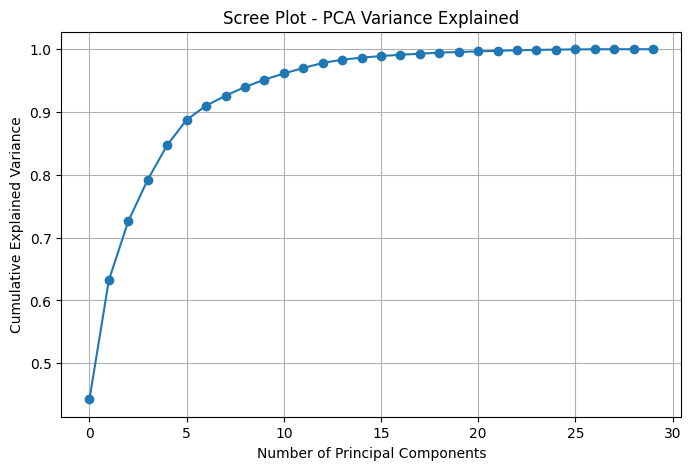

Number of components retained (95% variance): 10
Accuracy (Original Data): 0.9708
Accuracy (PCA-Transformed Data, 95% variance): 0.9474


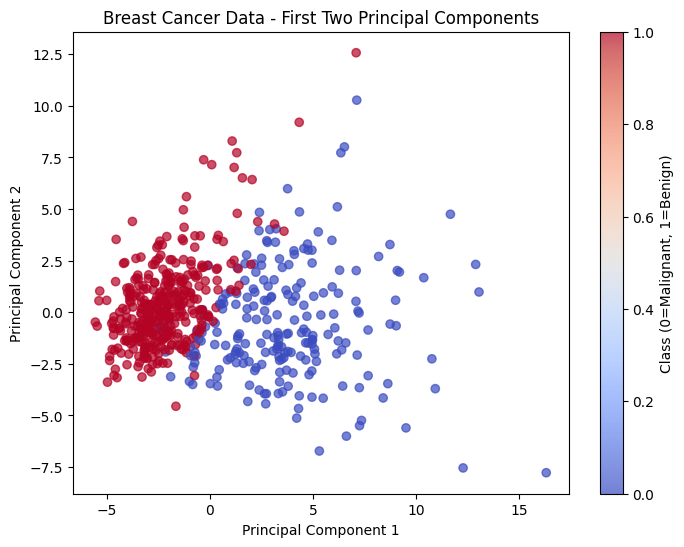

In [4]:
#Question 8 : PCA + KNN with Variance Analysis and Visualization
#Task:
#1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
#2. Apply PCA and plot the scree plot (explained variance ratio).
#3. Retain 95% variance and transform the dataset.
#4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
#5. Visualize the first two principal components using a scatter plot (color by class).

# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA and plot the scree plot (explained variance ratio)
pca = PCA().fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - PCA Variance Explained')
plt.grid(True)
plt.show()

# Step 5: Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components retained (95% variance): {pca_95.n_components_}")

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Step 7: Train KNN on original data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 8: Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 9: Compare results
print(f"Accuracy (Original Data): {acc_original:.4f}")
print(f"Accuracy (PCA-Transformed Data, 95% variance): {acc_pca:.4f}")

# Step 10: Visualize first two principal components
pca_2 = PCA(n_components=2)
X_2D = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_2D[:,0], X_2D[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Data - First Two Principal Components')
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.show()


Mean Squared Error (Euclidean, K=5): 4666.29
Mean Squared Error (Manhattan, K=5): 5444.08


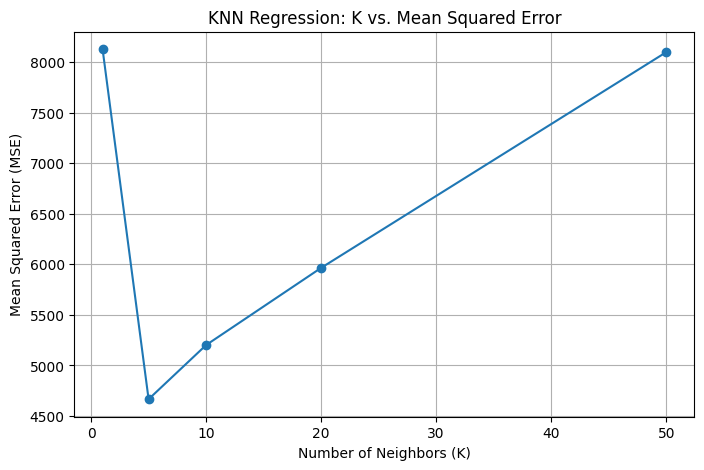

In [5]:
#Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
#Task:
#1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
#2. Train a KNN regressor with:
#a. Euclidean distance (K=5)
#b. Manhattan distance (K=5)
#c. Compare Mean Squared Error (MSE) for both.
#3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Step 3: Split dataset into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN Regressor with Euclidean distance (default = 'minkowski', p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 6: Train KNN Regressor with Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Step 7: Compare both
print("Mean Squared Error (Euclidean, K=5):", round(mse_euclidean, 2))
print("Mean Squared Error (Manhattan, K=5):", round(mse_manhattan, 2))

# Step 8: Analyze effect of K (Bias-Variance Tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Step 9: Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o')
plt.title("KNN Regression: K vs. Mean Squared Error")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
   Algorithm  Accuracy  Training Time (s)
0      brute  0.705628           0.017359
1    kd_tree  0.705628           0.010096
2  ball_tree  0.705628           0.008480


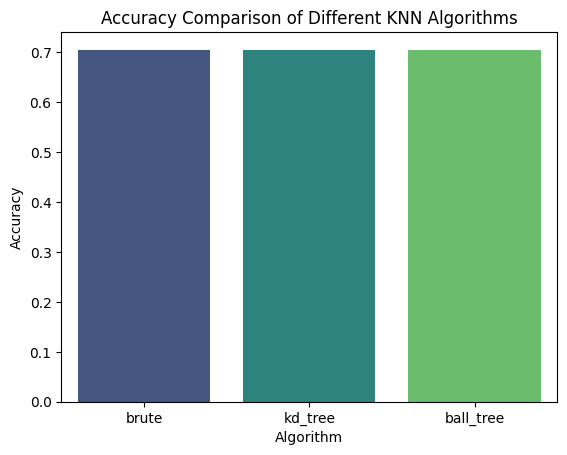

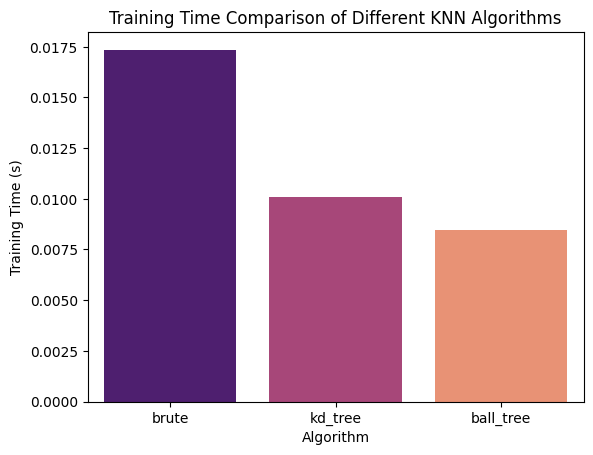

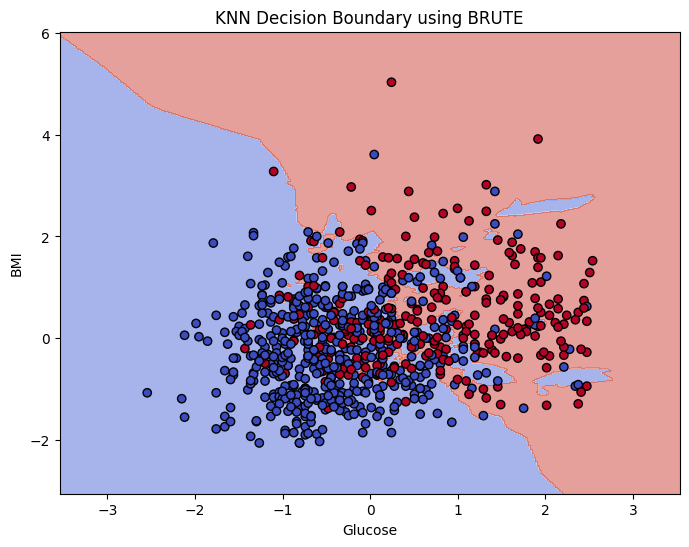

In [7]:
#Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-WorldData
#Task:
#1. Load the Pima Indians Diabetes dataset (contains missing values).
#2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
#3. Train KNN using:
#a. Brute-force method
#b. KD-Tree
#c. Ball Tree
#4. Compare their training time and accuracy.
#5. Plot the decision boundary for the best-performing method (use 2 most important features).
#Dataset: Pima Indians Diabetes

#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

#Step 2: Load Dataset (Pima Indians Diabetes)
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
print(df.head())

#Step 3: Handle Missing Values
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Step 4: Split Dataset
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Step 5: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 6: Train KNN Using Different Algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    start = time.time()
    model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    end = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    results.append((algo, acc, end - start))

# Display results
results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Training Time (s)'])
print(results_df)

#Step 7: Plot Comparison
sns.barplot(x='Algorithm', y='Accuracy', hue='Algorithm',
            data=results_df, palette='viridis', legend=False)
plt.title('Accuracy Comparison of Different KNN Algorithms')
plt.show()


sns.barplot(x='Algorithm', y='Training Time (s)', hue='Algorithm',
            data=results_df, palette='magma', legend=False)
plt.title('Training Time Comparison of Different KNN Algorithms')
plt.show()


#Step 8: Decision Boundary Visualization (for Top 2 Features)
# Select top 2 features
X_2 = df_imputed[['Glucose', 'BMI']]
y = df_imputed['Outcome']

# Scale
X_2_scaled = scaler.fit_transform(X_2)

# Train best algorithm (based on previous results)
best_algo = results_df.iloc[results_df['Accuracy'].idxmax()]['Algorithm']
model_2d = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
model_2d.fit(X_2_scaled, y)

# Plot decision boundary
x_min, x_max = X_2_scaled[:, 0].min() - 1, X_2_scaled[:, 0].max() + 1
y_min, y_max = X_2_scaled[:, 1].min() - 1, X_2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
plt.scatter(X_2_scaled[:, 0], X_2_scaled[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title(f'KNN Decision Boundary using {best_algo.upper()}')
plt.show()

